In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import seaborn as sns

In [7]:
# First generate some data. 
np.random.seed(1) # Set random seed for reproducibility. 
n=30              # Number of data points to sample. 
mean=10           # Mean Of random sample. 
sd = 4            # Standard deviation of random sample. 

x = np.random.normal(mean, sd,n) # Sample from normal distribution. 
noise = np.random.normal(0,4,n)  # Sample some noise for non-perfect correlation. 
df = pd.DataFrame({"x":x,
                   "perfect_pos":x,
                   "perfect_neg":np.max(x)-x,
                   "none":np.random.normal(mean,sd,n),
                   "positive": x +noise,
                   "negative": np.max(x) -  x + noise})
df.round(1).head() 

,x,perfect_pos,perfect_neg,none,positive,negative
0,16.5,16.5,0.5,7.0,13.7,-2.3
1,7.6,7.6,9.4,15.0,6.0,7.8
2,7.9,7.9,9.1,12.1,5.1,6.3
3,5.7,5.7,11.3,8.8,2.3,7.9
4,13.5,13.5,3.5,12.0,10.8,0.8


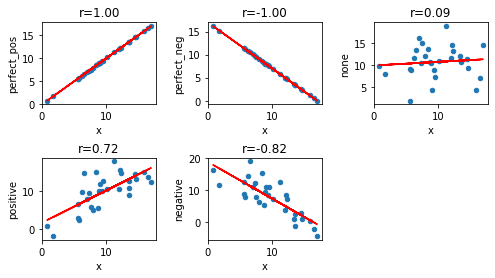

In [8]:
# Next, manually visual ise each relation as subplots on the same figure. 

# Create a figure object of size 8x4 inches, and an array of axes 
# objects. The shape of the axes array is (2, 3): 2 rows, 3 columns. 
fig, axes = plt.subplots(2, 3, figsize=(8, 4)) 
# Convert axes to 1D array. 
axes=axes.ravel( ) 

# Loop over columns and draw on separate axes. 
for var, i in zip(df.columns[1:], range(0,6)):
    df.plot.scatter('x', var, ax=axes [i]) 
    # Compute regression line. 
    slope, intercept, r_value, p_value, std_err=stats.linregress(x,df[var])
    axes[i].plot(x, slope * x + intercept, 'r') 
    axes[i].set_title('r={:0.2f}'.format(r_value)) 
# Delete unused (last) axes. 
fig.delaxes(axes[-1])
# Increase the space between subplots. 
fig.subplots_adjust(wspace=0.45, hspace=0.65)
plt.show() 

# Using Seaborn scatterplots

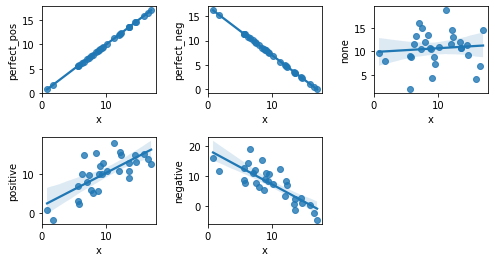

In [9]:
# Create a figure object of size 9x6 inches, and an array of axes
# objects. The shape of the array is (2, 3): 2 rows, 3 columns.
fig, axes = plt.subplots(2, 3, figsize=(8, 4))

sns.regplot(x="x", y="perfect_pos", data=df, ax=axes[0,0])
sns.regplot(x="x", y="perfect_neg", data=df, ax=axes[0,1])
sns.regplot(x="x", y="none", data=df, ax=axes[0,2])
sns.regplot(x="x", y="positive", data=df, ax=axes[1,0])
sns.regplot(x="x", y="negative", data=df, ax=axes[1,1])

# Increase the space between subplots. 
fig.delaxes(axes[1,2])
fig.subplots_adjust(wspace=0.45, hspace=0.5) 
plt.show() 